In [ ]:
import numpy as np
import pandas as pd
import matplotlib as cm
import matplotlib.pyplot as plt

In [ ]:
#importing data
data_train =pd.read_csv("train.csv")
data_train.head()
data_train.shape
data_train

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G


In [ ]:
#assigning each catogory a number for category feature
category={'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
#removing character f present in the data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [ ]:
#convert values to integers for views, likes, comments, dislikes, adview
data_train["views"]=pd.to_numeric(data_train["views"])
data_train["comment"]=pd.to_numeric(data_train["comment"])
data_train["likes"]=pd.to_numeric(data_train["likes"])
data_train["dislikes"]=pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_void=data_train['vidid']

In [ ]:
#encoding features like category, duration, vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [ ]:
#convert time to sec for duration
import datetime
import time

def checki(x):
      y=x[2:]
      h=''
      m=''
      s=''
      mm=''
      P=['H', 'M', 'S']
      for i in y:
         if i not in P:
             mm+=i
         else:
              if (i=="H"):
                h=mm
                mm=''
              elif(i=="M"):
                m=mm
                mm=''
              else:
                s=mm
                mm=''
         if(h==''):
           h='00'
         if(m==''):
           m='00'
         if(s==''):
           s='00'
         bp=h+':'+m+':'+s
         return bp
train = pd.read_csv("train.csv")
mp=pd.read_csv("train.csv")["duration"]
time= mp.apply(checki)


In [ ]:
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int (h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,0,6
1,2741,2,1707,56,2,6,2185,0,4
2,8138,1,2023,25,0,2,2094,0,3
3,9005,6,620860,777,161,153,2119,0,8
4,122,1,666,1,0,0,2091,0,4


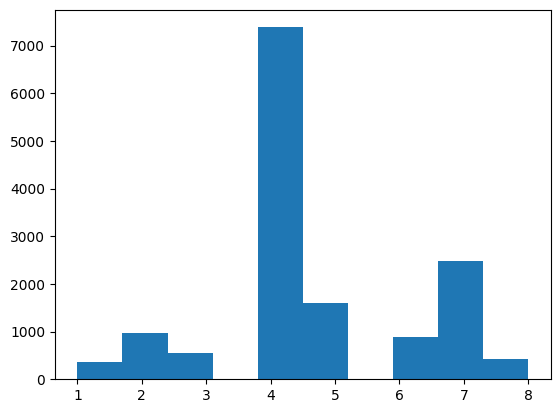

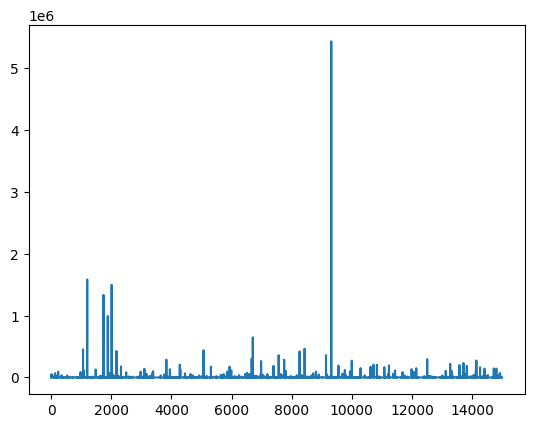

In [ ]:
#visualization
#individual plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])

#remove videos with advice greater thn 2000000 as outlier
data_train= data_train[data_train["adview"]<200000]

<ipython-input-27-d58e47b7e0e2>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


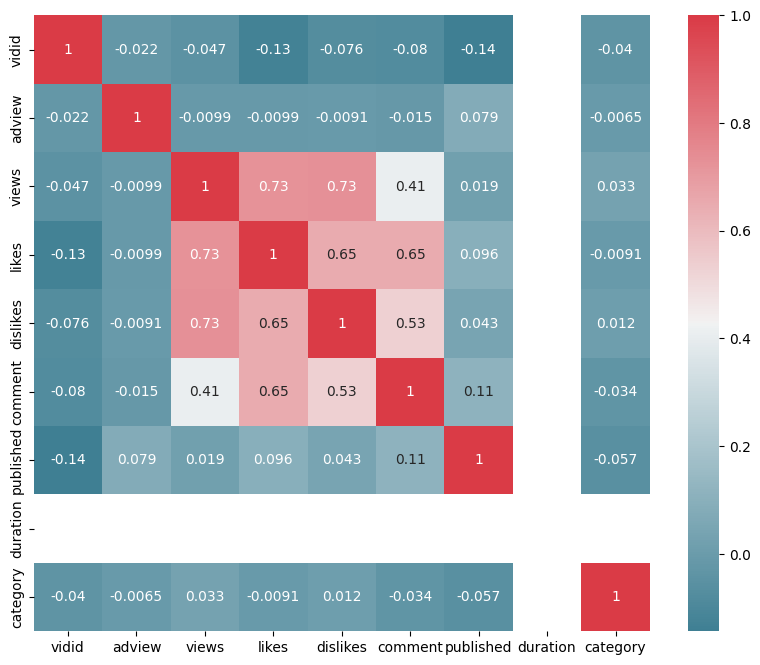

In [ ]:
#heatmap
import seaborn as sns
f, ax=plt.subplots(figsize=(10,8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()

In [ ]:
#split data
Y_train=pd.DataFrame(data_train.iloc[:, 1].values, columns=['target'])
data_train=data_train.drop(["adview"], axis=1)
data_train=data_train.drop(["vidid"], axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,0,6
1,1707,56,2,6,2185,0,4
2,2023,25,0,2,2094,0,3
3,620860,777,161,153,2119,0,8
4,666,1,0,0,2091,0,4


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11688, 7)

In [ ]:
#normalize data
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

X_train.mean()

0.17025826684516737

In [ ]:
#evalution Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction=model_name.predict(X_test)
  print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error : ', metrics.mean_squared_error(y_test, prediction))
  print('Rooot Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
#Linear regression
from sklearn import linear_model
linear_regression=linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test, y_test, linear_regression)

Mean Absolute Error :  1638.48017629013
Mean Squared Error :  67380253.76643546
Rooot Mean Squared Error :  8208.547603957442


In [ ]:
#dession Tree Regression
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test, y_test, decision_tree)

Mean Absolute Error :  1863.9260780287475
Mean Squared Error :  117296143.83641341
Rooot Mean Squared Error :  10830.334428650549


In [ ]:
#random Forest regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators=200
max_depth=25
min_samples_split=15
min_samples_leaf=2
random_forest=RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train, y_train)
print_error(X_test, y_test, linear_regression)

<ipython-input-33-2218c417bb67>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


Mean Absolute Error :  1638.48017629013
Mean Squared Error :  67380253.76643546
Rooot Mean Squared Error :  8208.547603957442


In [ ]:
#support vector Regressor
from sklearn.svm import SVR
supportvector_regressor=SVR()
supportvector_regressor.fit(X_train, y_train)
print_error(X_test, y_test, linear_regression)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error :  1638.48017629013
Mean Squared Error :  67380253.76643546
Rooot Mean Squared Error :  8208.547603957442


In [ ]:
#Artificial Neural Networks
import keras
from keras.layers import Dense

ann = keras.models.Sequential([
    Dense(6, activation="relu",
          input_shape=X_train.shape[1:]),
          Dense(6, activation="relu"),
          Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer, loss=loss, metrics=["mean_squared_error"])
history=ann.fit(X_train, y_train, epochs=100)
ann.summary()
print_error(X_test, y_test, ann)

Epoch 1/100
366/366 [==============================] - 1s 1ms/step - loss: 61805420.0000 - mean_squared_error: 61805420.0000
Epoch 2/100
366/366 [==============================] - 0s 1ms/step - loss: 61797056.0000 - mean_squared_error: 61797056.0000
Epoch 3/100
366/366 [==============================] - 0s 1ms/step - loss: 61775664.0000 - mean_squared_error: 61775664.0000
Epoch 4/100
366/366 [==============================] - 0s 1ms/step - loss: 61730764.0000 - mean_squared_error: 61730764.0000
Epoch 5/100
366/366 [==============================] - 0s 1ms/step - loss: 61656044.0000 - mean_squared_error: 61656044.0000
Epoch 6/100
366/366 [==============================] - 0s 1ms/step - loss: 61565516.0000 - mean_squared_error: 61565516.0000
Epoch 7/100
366/366 [==============================] - 0s 1ms/step - loss: 61472152.0000 - mean_squared_error: 61472152.0000
Epoch 8/100
366/366 [==============================] - 0s 1ms/step - loss: 61385116.0000 - mean_squared_error: 61385116.0000


In [ ]:
#saving scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pk")

['decisiontree_youtubeadview.pk']

In [ ]:
#saving keras artificial neural networks model
ann.save("ann.youtubeadview.hS")